In [1]:
import pandas as pd
import scipy as sp
import numpy as np

In [2]:
CP_data_1 = sp.io.loadmat('../CP_data/1-46_CP_data.mat')
CP_data_2 = sp.io.loadmat('../CP_data/51-100_CP_data.mat')
CP_data_3 = sp.io.loadmat('../CP_data/101-166_CP_data.mat')
CP_data_4 = sp.io.loadmat('../CP_data/168-178_CP_data.mat')

In [3]:
CP_data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CP', 'Grand_CP', 'grandcpboot', 'new_paths', 'p_values'])

In [4]:
CP_1 = CP_data_1.get('CP')
Grand_CP_1 = CP_data_1.get('Grand_CP')
grandcpboot_1 = CP_data_1.get('grandcpboot')
p_values_1 = CP_data_1.get('p_values')
data_paths_1 = CP_data_1.get('new_paths')

In [5]:
CP_2 = CP_data_2.get('CP')
Grand_CP_2 = CP_data_2.get('Grand_CP')
grandcpboot_2 = CP_data_2.get('grandcpboot')
p_values_2 = CP_data_2.get('p_values')
data_paths_2 = CP_data_2.get('new_paths')

In [6]:
CP_3 = CP_data_3.get('CP')
Grand_CP_3 = CP_data_3.get('Grand_CP')
grandcpboot_3 = CP_data_3.get('grandcpboot')
p_values_3 = CP_data_3.get('p_values')
data_paths_3 = CP_data_3.get('new_paths')

In [7]:
CP_4 = CP_data_4.get('CP')
Grand_CP_4 = CP_data_4.get('Grand_CP')
grandcpboot_4 = CP_data_4.get('grandcpboot')
p_values_4 = CP_data_4.get('p_values')
data_paths_4 = CP_data_4.get('new_paths')

Now that data is extracted let look at the Grand CP Histograms of the 200 ms duration tone in noise. Split them into seperate histos for IC and CN.  

In [8]:
# Initial Split and concat grand cp values into seperate IC and CN df's
# column 16 (index 15) is the 200 ms condition 
# Group 1 -- 1- 46 is all IC ,  
# Group 2 --  51 - 100 is all IC , 
# Group 3 --  101-166 is first 2 IC and the rest CN,
# Group 4 --  168-178 is all CN

# IC values 
IC_value_list = []

for row in range(0,len(Grand_CP_1[:,15])):
    if (type(Grand_CP_1[:,15][row][0]) == np.ndarray) & (len(Grand_CP_1[:,15][row][0]) > 0):
         value = Grand_CP_1[:,15][row][0,0]   
    else:
         value = Grand_CP_1[:,15][row][0]

    IC_value_list.append(value)

for row in range(0,len(Grand_CP_2[:,15])):
    if (type(Grand_CP_2[:,15][row][0]) == np.ndarray) & (len(Grand_CP_2[:,15][row][0]) > 0): # this handles the NA values
         value = Grand_CP_2[:,15][row][0,0]   
    else:
         value = Grand_CP_2[:,15][row][0]

    IC_value_list.append(value)

for row in range(0,2):# Grab the first 2 IC's from the 3rd group
    if (type(Grand_CP_3[:,15][row][0]) == np.ndarray) & (len(Grand_CP_3[:,15][row][0]) > 0):
         value = Grand_CP_3[:,15][row][0,0]   
    else:
         value = Grand_CP_3[:,15][row][0]

    IC_value_list.append(value)



In [9]:
# CN values 
CN_value_list = []
for row in range(2,len(Grand_CP_3[:,15])):#Exclude the first 2 rows that are IC 
    if (type(Grand_CP_3[:,15][row][0]) == np.ndarray) & (len(Grand_CP_3[:,15][row][0]) > 0):
         value = Grand_CP_3[:,15][row][0,0]   
    else:
         value = Grand_CP_3[:,15][row][0]

    CN_value_list.append(value)    

for row in range(0,len(Grand_CP_4[:,15])):
    if (type(Grand_CP_4[:,15][row][0]) == np.ndarray) & (len(Grand_CP_4[:,15][row][0]) > 0): # this handles the NA values
         value = Grand_CP_4[:,15][row][0,0]   
    else:
         value = Grand_CP_4[:,15][row][0]

    CN_value_list.append(value)   

Now we have 2 list for the 200ms tone column for IC and CN, lets filter out NA or empty data and plot the histograms

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Filter the lists fro NA's and emptys and turn them into pd.DataFrame
IC_df = pd.DataFrame(IC_value_list, columns=['200_ms_Tone_Grand_CP'])
CN_df = pd.DataFrame(CN_value_list, columns=['200_ms_Tone_Grand_CP'])

In [12]:
for row in range(0,len(IC_df)):
    if (type(IC_df['200_ms_Tone_Grand_CP'][row]) == np.ndarray) | (type(IC_df['200_ms_Tone_Grand_CP'][row]) == np.str_):
        IC_df['200_ms_Tone_Grand_CP'][row] = np.nan

for row in range(0,len(CN_df)):
    if (type(CN_df['200_ms_Tone_Grand_CP'][row]) == np.ndarray) | (type(CN_df['200_ms_Tone_Grand_CP'][row]) == np.str_):
        CN_df['200_ms_Tone_Grand_CP'][row] = np.nan


In [13]:
# Count the NA values to get total number of Units for IC and CN
total_units_IC = len(IC_df.dropna())
total_units_CN = len(CN_df.dropna())
print(total_units_IC, total_units_CN)

95 59


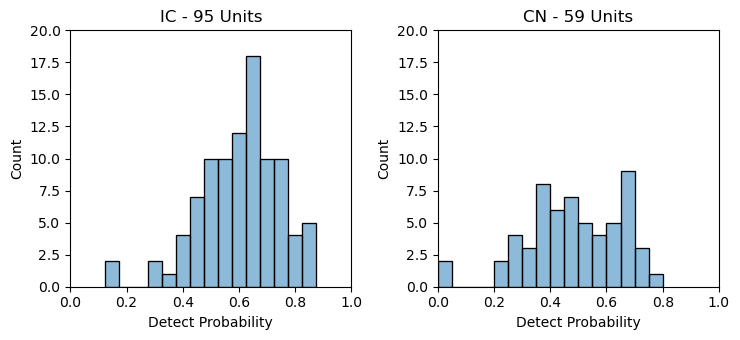

In [14]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlim([0,1])
axes[0].set_ylim([0,20])
axes[0].set_xlabel('Detect Probability')
axes[1].set_xlim([0,1])
axes[1].set_ylim([0,20])
axes[1].set_xlabel('Detect Probability')

# IC Histogram
axes[0].set_title('IC - 95 Units')
sns.histplot(ax = axes[0],
             data = IC_df,
             binwidth = .05,
             legend = False
            )



# CN Histogram
axes[1].set_title('CN - 59 Units')
sns.histplot(ax = axes[1],
             data = CN_df,
             binwidth = .05,
             legend = False
            )

plt.show()